# **Natural Language Processing From Scratch**
## Text Representation






In this lesson we will see in some details how we can best represent text in our application. Let's start by importing the modules we will be using:

In [1]:
import string
from collections import Counter
from pprint import pprint
import gzip
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

We choose a well known nursery rhyme, that has the added distinction of having been the first audio ever recorded, to be the short snippet of text that we will ise in our examples:

In [2]:
text = """Mary had a little lamb, little lamb,
    little lamb. Mary had a little lamb
    whose fleece was white as snow.
    And everywhere that Mary went
    Mary went, Mary went. Everywhere
    that Mary went,
    The lamb was sure to go"""

# **Tokenization**
The first step in any analysis is to tokenize the text. What this means is that we will extract all the individual words in the text. For the sake of simplicity, we will assume that our text is well formed and that our words are delimited either by white spece or punctuation characters.

In [3]:
def extract_words(text):
    temp = text.split() # Split the text on whitespace
    text_words = []

    for word in temp:
        # Remove any punctuation characters present in the beginning of the word
        while word[0] in string.punctuation:
            word = word[1:]
        
        # Remove any punctuation characters present in the end of the word
        while word[-1] in string.punctuation:
            word = word[:-1]
        
        # Append this word into our list of words.
        text_words.append(word.lower())

    return text_words

        

In [4]:
text.split()

['Mary',
 'had',
 'a',
 'little',
 'lamb,',
 'little',
 'lamb,',
 'little',
 'lamb.',
 'Mary',
 'had',
 'a',
 'little',
 'lamb',
 'whose',
 'fleece',
 'was',
 'white',
 'as',
 'snow.',
 'And',
 'everywhere',
 'that',
 'Mary',
 'went',
 'Mary',
 'went,',
 'Mary',
 'went.',
 'Everywhere',
 'that',
 'Mary',
 'went,',
 'The',
 'lamb',
 'was',
 'sure',
 'to',
 'go']

After this step we now have our text represented as an array of individual, lowercase words.

In [5]:
text_words = extract_words(text)
pprint(text_words)

['mary',
 'had',
 'a',
 'little',
 'lamb',
 'little',
 'lamb',
 'little',
 'lamb',
 'mary',
 'had',
 'a',
 'little',
 'lamb',
 'whose',
 'fleece',
 'was',
 'white',
 'as',
 'snow',
 'and',
 'everywhere',
 'that',
 'mary',
 'went',
 'mary',
 'went',
 'mary',
 'went',
 'everywhere',
 'that',
 'mary',
 'went',
 'the',
 'lamb',
 'was',
 'sure',
 'to',
 'go']


This is a wasteful way to represent text. We can be much more efficient by representing each word by a number. 

In [6]:
word_dict = {}
word_list = []
vocabulary_size = 0
text_tokens = []

for word in text_words:
    # If we are seeing this word for the first time, create an id for it and add it to our word dictionary
    if word not in word_dict:
        word_dict[word] = vocabulary_size
        word_list.append(word)
        vocabulary_size += 1

    # Add the token corresponding to the current word to the tokenized text.
    text_tokens.append(word_dict[word])

When we were tokenizing our text, we also generated a dictionary **word_dict** that maps words to integers and a **word_list**  that maps each integer to the corresponding word. 

In [7]:
pprint(word_list)
pprint(word_dict)

['mary',
 'had',
 'a',
 'little',
 'lamb',
 'whose',
 'fleece',
 'was',
 'white',
 'as',
 'snow',
 'and',
 'everywhere',
 'that',
 'went',
 'the',
 'sure',
 'to',
 'go']
{'a': 2,
 'and': 11,
 'as': 9,
 'everywhere': 12,
 'fleece': 6,
 'go': 18,
 'had': 1,
 'lamb': 4,
 'little': 3,
 'mary': 0,
 'snow': 10,
 'sure': 16,
 'that': 13,
 'the': 15,
 'to': 17,
 'was': 7,
 'went': 14,
 'white': 8,
 'whose': 5}


These two datastructures already proved their usefulness when we converted our text to a list of tokens.

In [8]:
print(text_tokens)

[0, 1, 2, 3, 4, 3, 4, 3, 4, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 0, 14, 0, 14, 0, 14, 12, 13, 0, 14, 15, 4, 7, 16, 17, 18]


In [9]:
word_dict

{'a': 2,
 'and': 11,
 'as': 9,
 'everywhere': 12,
 'fleece': 6,
 'go': 18,
 'had': 1,
 'lamb': 4,
 'little': 3,
 'mary': 0,
 'snow': 10,
 'sure': 16,
 'that': 13,
 'the': 15,
 'to': 17,
 'was': 7,
 'went': 14,
 'white': 8,
 'whose': 5}

Unfortunately, while this representation is convenient for memory reasons it has some severe limitations. Perhaps the most important of which is the fact that computers naturally assume that numbers can be operated on mathematically (by addition, subtraction, etc) in a way that doesn't match our understanding of words.

# **One-hot encoding**
One typical way of overcoming this difficulty is to represent each word by a one-hot encoded vector where every element is zero except the one corresponding to a specific word.

In [10]:
def one_hot(word, word_dict):
    # Generate a one-hot encoded vector corresponding to word
    vector = np.zeros(len(word_dict))
    vector[word_dict[word]] = 1
    return vector

In [11]:
one_hot('mary', word_dict)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

So, for example, the word 'fleece' would be represented by:

In [12]:
fleece_hot = one_hot('fleece', word_dict)
print(fleece_hot)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


This vector has every element set to zero, except element 6, since:

In [13]:
print(word_dict['fleece'])
fleece_hot[6] == 1

6


True

# **Bag of words**
We can now use the one-hot encoded vector for each word to produce a vector representation of our original text, by simply adding up all the one-hot encoded vectors.

In [14]:
text_vector1 = np.zeros(vocabulary_size)

for word in text_words:
    hot_word = one_hot(word, word_dict)
    text_vector1 += hot_word
print(text_vector1)

[6. 2. 2. 4. 5. 1. 1. 2. 1. 1. 1. 1. 2. 2. 4. 1. 1. 1. 1.]


In [15]:
print(text_vector1.shape)
print(word_list)
print(len(word_list))
v = np.zeros(5)
print(np.zeros(5))
v2 = [0, 0,0,0,3]
print([0, 0, 0, 0, 3])
print(v + v2)

(19,)
['mary', 'had', 'a', 'little', 'lamb', 'whose', 'fleece', 'was', 'white', 'as', 'snow', 'and', 'everywhere', 'that', 'went', 'the', 'sure', 'to', 'go']
19
[0. 0. 0. 0. 0.]
[0, 0, 0, 0, 3]
[0. 0. 0. 0. 3.]


In [16]:
len(text_words)
print(text_words)

['mary', 'had', 'a', 'little', 'lamb', 'little', 'lamb', 'little', 'lamb', 'mary', 'had', 'a', 'little', 'lamb', 'whose', 'fleece', 'was', 'white', 'as', 'snow', 'and', 'everywhere', 'that', 'mary', 'went', 'mary', 'went', 'mary', 'went', 'everywhere', 'that', 'mary', 'went', 'the', 'lamb', 'was', 'sure', 'to', 'go']


In practice, we can also easily skip the encoding step at the word level by using the word_dict defined above:

In [17]:
text_vector = np.zeros(vocabulary_size)
for word in text_words:
    text_vector[word_dict[word]] += 1

print(text_vector)

[6. 2. 2. 4. 5. 1. 1. 2. 1. 1. 1. 1. 2. 2. 4. 1. 1. 1. 1.]


This is known as the bag of words representation of the textt. It should be noted that these vectors simply contains the number of times each word appears in our document, so we can easily tell that the word *mary* appears exactly 6 times in our little nursery rhyme.

In [18]:
text_vector[word_dict['mary']]

6.0

A more pythonic and efficient way of producing the same result is to use the standard *Counter* module:

In [19]:
word_counts = Counter(text_words)
pprint(word_counts)

Counter({'mary': 6,
         'lamb': 5,
         'little': 4,
         'went': 4,
         'had': 2,
         'a': 2,
         'was': 2,
         'everywhere': 2,
         'that': 2,
         'whose': 1,
         'fleece': 1,
         'white': 1,
         'as': 1,
         'snow': 1,
         'and': 1,
         'the': 1,
         'sure': 1,
         'to': 1,
         'go': 1})


From which we can easily generate the text_vector and word_dict data structures:

In [20]:
items = list(word_counts.items())
# Extract word dictionary and vector representation
word_dict2 = dict([[items[i][0], i] for i in range(len(items))])
text_vector2 = [items[i][1] for i in range(len(items))]

In [21]:
type(items[0])
print(items[0])
print(items[0][0])
print(text_vector2)
print(word_dict2)
print(text_vector)
print(word_dict)

('mary', 6)
mary
[6, 2, 2, 4, 5, 1, 1, 2, 1, 1, 1, 1, 2, 2, 4, 1, 1, 1, 1]
{'mary': 0, 'had': 1, 'a': 2, 'little': 3, 'lamb': 4, 'whose': 5, 'fleece': 6, 'was': 7, 'white': 8, 'as': 9, 'snow': 10, 'and': 11, 'everywhere': 12, 'that': 13, 'went': 14, 'the': 15, 'sure': 16, 'to': 17, 'go': 18}
[6. 2. 2. 4. 5. 1. 1. 2. 1. 1. 1. 1. 2. 2. 4. 1. 1. 1. 1.]
{'mary': 0, 'had': 1, 'a': 2, 'little': 3, 'lamb': 4, 'whose': 5, 'fleece': 6, 'was': 7, 'white': 8, 'as': 9, 'snow': 10, 'and': 11, 'everywhere': 12, 'that': 13, 'went': 14, 'the': 15, 'sure': 16, 'to': 17, 'go': 18}


In [22]:
for word in word_dict.keys():
    if text_vector[word_dict[word]] != text_vector2[word_dict2[word]]:
        print('Error!')

# **Term Frequency**

In [23]:
items

[('mary', 6),
 ('had', 2),
 ('a', 2),
 ('little', 4),
 ('lamb', 5),
 ('whose', 1),
 ('fleece', 1),
 ('was', 2),
 ('white', 1),
 ('as', 1),
 ('snow', 1),
 ('and', 1),
 ('everywhere', 2),
 ('that', 2),
 ('went', 4),
 ('the', 1),
 ('sure', 1),
 ('to', 1),
 ('go', 1)]

Intuitively, we expect the frequency with which a given word is mentioned should correspond to the relevance of that word for the piece of text we are considering. 'mary' is a pretty important word in our little nursery rhyme and indeed it is the one that that occurs the most often:

In [24]:
sorted(items, key=lambda x: x[1], reverse=True)

[('mary', 6),
 ('lamb', 5),
 ('little', 4),
 ('went', 4),
 ('had', 2),
 ('a', 2),
 ('was', 2),
 ('everywhere', 2),
 ('that', 2),
 ('whose', 1),
 ('fleece', 1),
 ('white', 1),
 ('as', 1),
 ('snow', 1),
 ('and', 1),
 ('the', 1),
 ('sure', 1),
 ('to', 1),
 ('go', 1)]

In [25]:
data = []

for line in gzip.open('/content/drive/MyDrive/NLP/text8.gz', 'rt'):
    data.extend(line.strip().split())

In [26]:
print(len(data))
print(data[0])
print(type(data))
print(data[:10])
dir(data)
print(data.index('anarchism'))

17005207
anarchism
<class 'list'>
['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against']
0


In [27]:

counts = Counter(data)

sorted_counts = sorted(list(counts.items()), key=lambda x: x[1], reverse=True)

for word, count in sorted_counts[:10]:
    print(word, count)

the 1061396
of 593677
and 416629
one 411764
in 372201
a 325873
to 316376
zero 264975
nine 250430
two 192644


In [28]:
print(counts.most_common(19))

[('the', 1061396), ('of', 593677), ('and', 416629), ('one', 411764), ('in', 372201), ('a', 325873), ('to', 316376), ('zero', 264975), ('nine', 250430), ('two', 192644), ('is', 183153), ('as', 131815), ('eight', 125285), ('for', 118445), ('s', 116710), ('five', 115789), ('three', 114775), ('was', 112807), ('by', 111831)]


In [29]:
print(len(counts))
print(type(counts))
print(counts.values().__len__())

253854
<class 'collections.Counter'>
253854


<class 'collections.Counter'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.int64'>


Text(0.5, 1.0, 'Word frequency distribution')

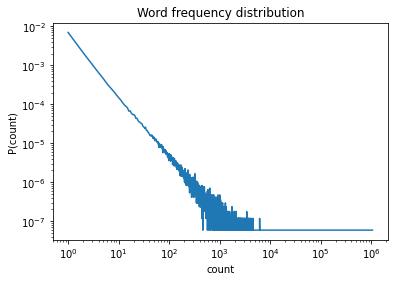

In [52]:
# Grouping words with same frequency
dist = Counter(counts.values())
print(type(dist))
dist = list(dist.items())
dist.sort(key=lambda x: x[0])

dist = np.array(dist)
print(type(dist))
print(type(dist.T))
print(type(dist.T[0]))
print(type(dist.T))
norm = np.dot(dist.T[0], dist.T[1])
print(type(norm))

plt.loglog(dist.T[0], dist.T[1]/norm)
plt.xlabel('count')
plt.ylabel('P(count)')
plt.title('Word frequency distribution')

In [41]:
print(len(counts.values()))
# print(counts.values())
# print(type(counts.keys()))
print(type(counts.keys()))
print(type(counts))
print(type(counts.items()))

253854
<class 'dict_keys'>
<class 'collections.Counter'>
<class 'dict_items'>


In [53]:
stopwords = set([word for word, count in sorted_counts[:100]])

clean_data = []

for word in data:
    if word not in stopwords:
        clean_data.append(word)

print(f'Original size: {len(data)}')
print(f'clean size: {len(clean_data)}')
print(f'Reduction: {1-len(clean_data)/len(data)}')

Original size: 17005207
clean size: 9006229
Reduction: 0.470384041782026


In [59]:
# words that appear across multiple documents
print(type(text), len(text))
print(text)
corpus_text = text.split('.')
print(corpus_text)
print(type(corpus_text))
print(len(corpus_text))
corpus_words = []

for document in corpus_text:
    doc_words = extract_words(document)
    corpus_words.append(doc_words)

print(corpus_words)

<class 'str'> 231
Mary had a little lamb, little lamb,
    little lamb. Mary had a little lamb
    whose fleece was white as snow.
    And everywhere that Mary went
    Mary went, Mary went. Everywhere
    that Mary went,
    The lamb was sure to go
['Mary had a little lamb, little lamb,\n    little lamb', ' Mary had a little lamb\n    whose fleece was white as snow', '\n    And everywhere that Mary went\n    Mary went, Mary went', ' Everywhere\n    that Mary went,\n    The lamb was sure to go']
<class 'list'>
4
[['mary', 'had', 'a', 'little', 'lamb', 'little', 'lamb', 'little', 'lamb'], ['mary', 'had', 'a', 'little', 'lamb', 'whose', 'fleece', 'was', 'white', 'as', 'snow'], ['and', 'everywhere', 'that', 'mary', 'went', 'mary', 'went', 'mary', 'went'], ['everywhere', 'that', 'mary', 'went', 'the', 'lamb', 'was', 'sure', 'to', 'go']]


In [60]:
pprint(corpus_words)

[['mary', 'had', 'a', 'little', 'lamb', 'little', 'lamb', 'little', 'lamb'],
 ['mary',
  'had',
  'a',
  'little',
  'lamb',
  'whose',
  'fleece',
  'was',
  'white',
  'as',
  'snow'],
 ['and', 'everywhere', 'that', 'mary', 'went', 'mary', 'went', 'mary', 'went'],
 ['everywhere',
  'that',
  'mary',
  'went',
  'the',
  'lamb',
  'was',
  'sure',
  'to',
  'go']]


In [63]:
# word that appears in documents
document_count = {}

for document in corpus_words:
    word_set = set(document)

    for word in word_set:
        document_count[word] = document_count.get(word, 0) + 1
pprint(document_count)

# pprint(sorted(document_count, key=lambda x: x[0], reverse=False))

{'a': 2,
 'and': 1,
 'as': 1,
 'everywhere': 2,
 'fleece': 1,
 'go': 1,
 'had': 2,
 'lamb': 3,
 'little': 2,
 'mary': 4,
 'snow': 1,
 'sure': 1,
 'that': 2,
 'the': 1,
 'to': 1,
 'was': 2,
 'went': 2,
 'white': 1,
 'whose': 1}
['a',
 'as',
 'and',
 'everywhere',
 'fleece',
 'go',
 'had',
 'little',
 'lamb',
 'mary',
 'snow',
 'sure',
 'that',
 'the',
 'to',
 'whose',
 'was',
 'white',
 'went']


In [64]:
def inv_doc_freq(corpus_words):
    number_docs = len(corpus_words)
    print(type(corpus_words))

    document_count = {}

    for document in corpus_words:
        word_set = set(document)

        for word in word_set:
            document_count[word] = document_count.get(word, 0) + 1

    IDF = {}

    for word in document_count:
        IDF[word] = np.log(number_docs / document_count[word])

    return IDF

In [67]:
IDF = inv_doc_freq(corpus_words)
pprint(IDF)
# pprint(sorted(IDF, key=lambda x: x[0], reverse=False))

<class 'list'>
{'a': 0.6931471805599453,
 'and': 1.3862943611198906,
 'as': 1.3862943611198906,
 'everywhere': 0.6931471805599453,
 'fleece': 1.3862943611198906,
 'go': 1.3862943611198906,
 'had': 0.6931471805599453,
 'lamb': 0.28768207245178085,
 'little': 0.6931471805599453,
 'mary': 0.0,
 'snow': 1.3862943611198906,
 'sure': 1.3862943611198906,
 'that': 0.6931471805599453,
 'the': 1.3862943611198906,
 'to': 1.3862943611198906,
 'was': 0.6931471805599453,
 'went': 0.6931471805599453,
 'white': 1.3862943611198906,
 'whose': 1.3862943611198906}
['a',
 'as',
 'and',
 'everywhere',
 'fleece',
 'go',
 'had',
 'little',
 'lamb',
 'mary',
 'snow',
 'sure',
 'that',
 'the',
 'to',
 'whose',
 'was',
 'white',
 'went']


In [68]:
def tf_idf(corpus_words):
    IDF = inv_doc_freq(corpus_words)

    TFIDF = []

    for document in corpus_words:
         TFIDF.append(Counter(document))

    for document in TFIDF:
        for word in document:
            document[word] = document[word] * IDF[word]
    return TFIDF

In [69]:
tf_idf(corpus_words)

<class 'list'>


[Counter({'a': 0.6931471805599453,
          'had': 0.6931471805599453,
          'lamb': 0.8630462173553426,
          'little': 2.0794415416798357,
          'mary': 0.0}),
 Counter({'a': 0.6931471805599453,
          'as': 1.3862943611198906,
          'fleece': 1.3862943611198906,
          'had': 0.6931471805599453,
          'lamb': 0.28768207245178085,
          'little': 0.6931471805599453,
          'mary': 0.0,
          'snow': 1.3862943611198906,
          'was': 0.6931471805599453,
          'white': 1.3862943611198906,
          'whose': 1.3862943611198906}),
 Counter({'and': 1.3862943611198906,
          'everywhere': 0.6931471805599453,
          'mary': 0.0,
          'that': 0.6931471805599453,
          'went': 2.0794415416798357}),
 Counter({'everywhere': 0.6931471805599453,
          'go': 1.3862943611198906,
          'lamb': 0.28768207245178085,
          'mary': 0.0,
          'sure': 1.3862943611198906,
          'that': 0.6931471805599453,
          'the': 1.3

In [71]:
V = set('aeiouy')
C = set('bcdfghjklmnpqrstvwxz')

In [70]:
def get_stem(suffix, word):
    # Extract the stem of a word

    if word.lower().endswith(suffix.lower()):
        return word[:-len(suffix)]
    return None

In [73]:
def measure(orig_word):
    # 
    word = orig_word.lower()

    optV = False
    optC = False
    VC = False
    m = 0

    pos = 0

    while pos < len(word) and word[pos] in C:
        pos += 1
        optc = True

    while pos < len(word):
        while pos < len(word) and word[pos] in V:
            pos += 1
            optV = True

        while pos < len(word) and word[pos] in C:
            pos += 1
            optV = False
        if not optV:
            m += 1
    return m

In [74]:
word = 'crepusculars'
print(measure(word))

4


In [76]:
def ends_with(char, stem):
    return stem[-1] == char
def double_consonant(stem):
    if len(stem) < 2:
        return False
    if stem[-1] in C and stem[-2] == stem[-1]:
        return True
    return False
def contains_vowel(stem):
    return len(set(stem) & V) > 0

In [80]:
def apply_rule(condition, suffix, replacement, word):
    # apply porter stemmer rule
    # if condition is True replace suffix by replacement in word
    stem = get_stem(suffix, word)
    if stem is not None and condition is True:
        word = stem

        if replacement is not None:
            word += replacement
    return word

In [81]:
word = 'plastered'
suffix = 'ed'
stem = get_stem(suffix, word)
apply_rule(contains_vowel(stem), suffix, None, word)

'plaster'

In [83]:
word = 'bled'
suffix = 'ed'
stem = get_stem(suffix, word)
apply_rule(contains_vowel(stem), suffix, None, word)

'bled'

In [84]:
word = 'adoption'
suffix = 'ion'
stem = get_stem(suffix, word)
apply_rule(measure(stem) > 1 and (ends_with('s', stem) or ends_with('t', stem)), suffix, None, word)

'adopt'